In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import preprocessing
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)


In [9]:

def split_and_train(n,df):
  KNN =  KNeighborsClassifier(n_neighbors=n)
  y_pred=KNN.fit(X_train, y_train).predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  print(f"Accuracy for K-Nearest Neighbors model with {n} neighbors \t: {acc}")
  return acc



In [10]:
def classification_report_for_KNN(n,df):
  KNN =  KNeighborsClassifier(n_neighbors=n)
  y_pred=KNN.fit(X_train, y_train).predict(X_test)
  print(classification_report(y_test, y_pred))



In [11]:
split_and_train(5,df)

Accuracy for K-Nearest Neighbors model with 5 neighbors 	: 0.7272727272727273


0.7272727272727273

In [12]:
k_values = np.arange(1, 31,2)
accuracy_scores = []
for k in k_values:
    acc = split_and_train(k,df)
    accuracy_scores.append(acc)

Accuracy for K-Nearest Neighbors model with 1 neighbors 	: 0.7077922077922078
Accuracy for K-Nearest Neighbors model with 3 neighbors 	: 0.6948051948051948
Accuracy for K-Nearest Neighbors model with 5 neighbors 	: 0.7272727272727273
Accuracy for K-Nearest Neighbors model with 7 neighbors 	: 0.7597402597402597
Accuracy for K-Nearest Neighbors model with 9 neighbors 	: 0.7597402597402597
Accuracy for K-Nearest Neighbors model with 11 neighbors 	: 0.7467532467532467
Accuracy for K-Nearest Neighbors model with 13 neighbors 	: 0.7402597402597403
Accuracy for K-Nearest Neighbors model with 15 neighbors 	: 0.7662337662337663
Accuracy for K-Nearest Neighbors model with 17 neighbors 	: 0.7532467532467533
Accuracy for K-Nearest Neighbors model with 19 neighbors 	: 0.7597402597402597
Accuracy for K-Nearest Neighbors model with 21 neighbors 	: 0.7792207792207793
Accuracy for K-Nearest Neighbors model with 23 neighbors 	: 0.7532467532467533
Accuracy for K-Nearest Neighbors model with 25 neighbors 

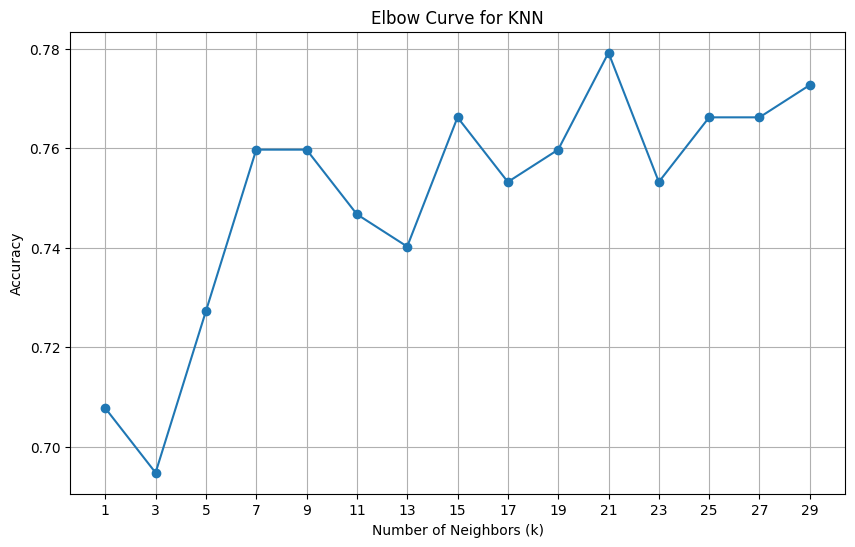

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Elbow Curve for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [14]:
classification_report_for_KNN(21,df)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       102
           1       0.75      0.52      0.61        52

    accuracy                           0.78       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.78      0.78      0.77       154



In [15]:
scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

X_train_scal, X_test_scal, y_train_scal, y_test_scal = train_test_split(X_scal, y, test_size=0.2, random_state=8)


In [16]:
def split_scale_train(k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scal, y_train_scal)
  y_pred_scal = knn.predict(X_test_scal)
  acc = metrics.accuracy_score(y_test_scal, y_pred_scal)
  print(f"Accuracy for K-Nearest Neighbors model with {k} neighbors \t: {acc}")
  return acc



In [17]:
k_values = np.arange(1, 31,2)
accuracy_scores = []
for k in k_values:
    acc = split_scale_train(k,)
    accuracy_scores.append(acc)

Accuracy for K-Nearest Neighbors model with 1 neighbors 	: 0.7402597402597403
Accuracy for K-Nearest Neighbors model with 3 neighbors 	: 0.6883116883116883
Accuracy for K-Nearest Neighbors model with 5 neighbors 	: 0.7402597402597403
Accuracy for K-Nearest Neighbors model with 7 neighbors 	: 0.7402597402597403
Accuracy for K-Nearest Neighbors model with 9 neighbors 	: 0.7662337662337663
Accuracy for K-Nearest Neighbors model with 11 neighbors 	: 0.7662337662337663
Accuracy for K-Nearest Neighbors model with 13 neighbors 	: 0.7662337662337663
Accuracy for K-Nearest Neighbors model with 15 neighbors 	: 0.7727272727272727
Accuracy for K-Nearest Neighbors model with 17 neighbors 	: 0.7987012987012987
Accuracy for K-Nearest Neighbors model with 19 neighbors 	: 0.7922077922077922
Accuracy for K-Nearest Neighbors model with 21 neighbors 	: 0.7922077922077922
Accuracy for K-Nearest Neighbors model with 23 neighbors 	: 0.7857142857142857
Accuracy for K-Nearest Neighbors model with 25 neighbors 

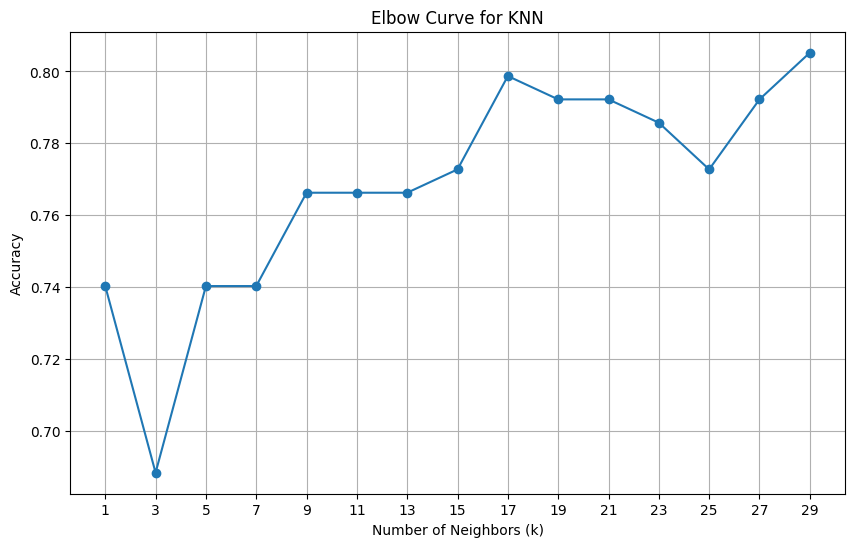

In [18]:

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Elbow Curve for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [19]:
scaler = MinMaxScaler()
model=scaler.fit(X)
X_scal = model.transform(X)

X_train_scal, X_test_scal, y_train_scal, y_test_scal = train_test_split(X_scal, y, test_size=0.2, random_state=8)

In [20]:
k_values = np.arange(1, 31,2)
accuracy_scores = []
for k in k_values:
    acc = split_scale_train(k,)
    accuracy_scores.append(acc)

Accuracy for K-Nearest Neighbors model with 1 neighbors 	: 0.7402597402597403
Accuracy for K-Nearest Neighbors model with 3 neighbors 	: 0.7402597402597403
Accuracy for K-Nearest Neighbors model with 5 neighbors 	: 0.7727272727272727
Accuracy for K-Nearest Neighbors model with 7 neighbors 	: 0.7597402597402597
Accuracy for K-Nearest Neighbors model with 9 neighbors 	: 0.7532467532467533
Accuracy for K-Nearest Neighbors model with 11 neighbors 	: 0.7727272727272727
Accuracy for K-Nearest Neighbors model with 13 neighbors 	: 0.8051948051948052
Accuracy for K-Nearest Neighbors model with 15 neighbors 	: 0.8116883116883117
Accuracy for K-Nearest Neighbors model with 17 neighbors 	: 0.8116883116883117
Accuracy for K-Nearest Neighbors model with 19 neighbors 	: 0.7987012987012987
Accuracy for K-Nearest Neighbors model with 21 neighbors 	: 0.7922077922077922
Accuracy for K-Nearest Neighbors model with 23 neighbors 	: 0.7857142857142857
Accuracy for K-Nearest Neighbors model with 25 neighbors 

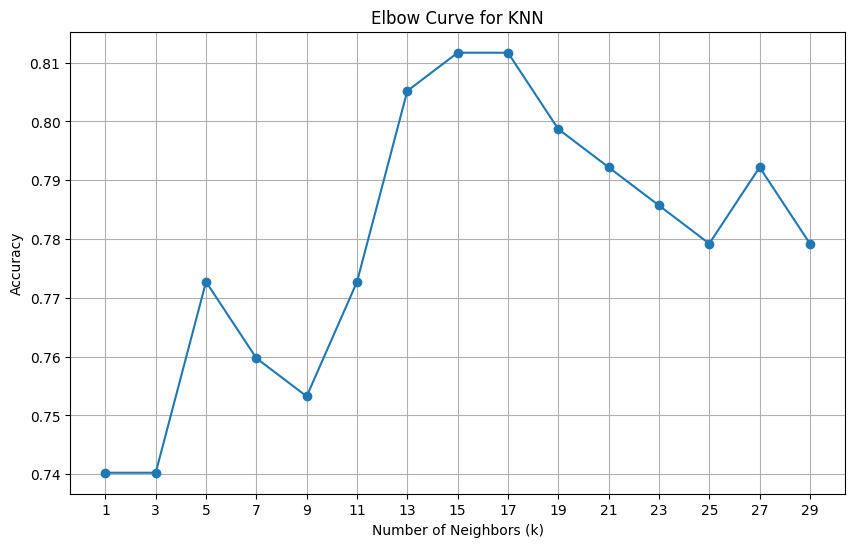

In [21]:

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Elbow Curve for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [22]:
dist = ["manhattan","chebyshev", "euclidean", "minkowski"]

In [23]:
def split_scale_train_with_dist(k, d):
  knn = KNeighborsClassifier(n_neighbors=k, metric = d)
  knn.fit(X_train_scal, y_train_scal)
  y_pred_scal = knn.predict(X_test_scal)
  acc = metrics.accuracy_score(y_test_scal, y_pred_scal)
  return acc



In [24]:
k_values = np.arange(1, 31,2)
accuracy_scores = []
for k in k_values:
  t_acc = []
  for d in dist:
    acc = split_scale_train_with_dist(k, d)
    t_acc.append(acc)
  accuracy_scores.append(t_acc)

In [25]:
print('  ',end='')
for d in dist:
  print(d,end='             ')
print('')
for k,a in enumerate(accuracy_scores):
  print(k*2+1,end=' ')
  for b in a :
    print(b, end="  ")
  print("")

  manhattan             chebyshev             euclidean             minkowski             
1 0.6753246753246753  0.6948051948051948  0.7402597402597403  0.7402597402597403  
3 0.6948051948051948  0.7402597402597403  0.7402597402597403  0.7402597402597403  
5 0.7467532467532467  0.7467532467532467  0.7727272727272727  0.7727272727272727  
7 0.7662337662337663  0.7792207792207793  0.7597402597402597  0.7597402597402597  
9 0.7727272727272727  0.7727272727272727  0.7532467532467533  0.7532467532467533  
11 0.7857142857142857  0.7857142857142857  0.7727272727272727  0.7727272727272727  
13 0.7727272727272727  0.7857142857142857  0.8051948051948052  0.8051948051948052  
15 0.7727272727272727  0.7922077922077922  0.8116883116883117  0.8116883116883117  
17 0.7792207792207793  0.7727272727272727  0.8116883116883117  0.8116883116883117  
19 0.7792207792207793  0.7792207792207793  0.7987012987012987  0.7987012987012987  
21 0.7727272727272727  0.7662337662337663  0.7922077922077922  0.792207792

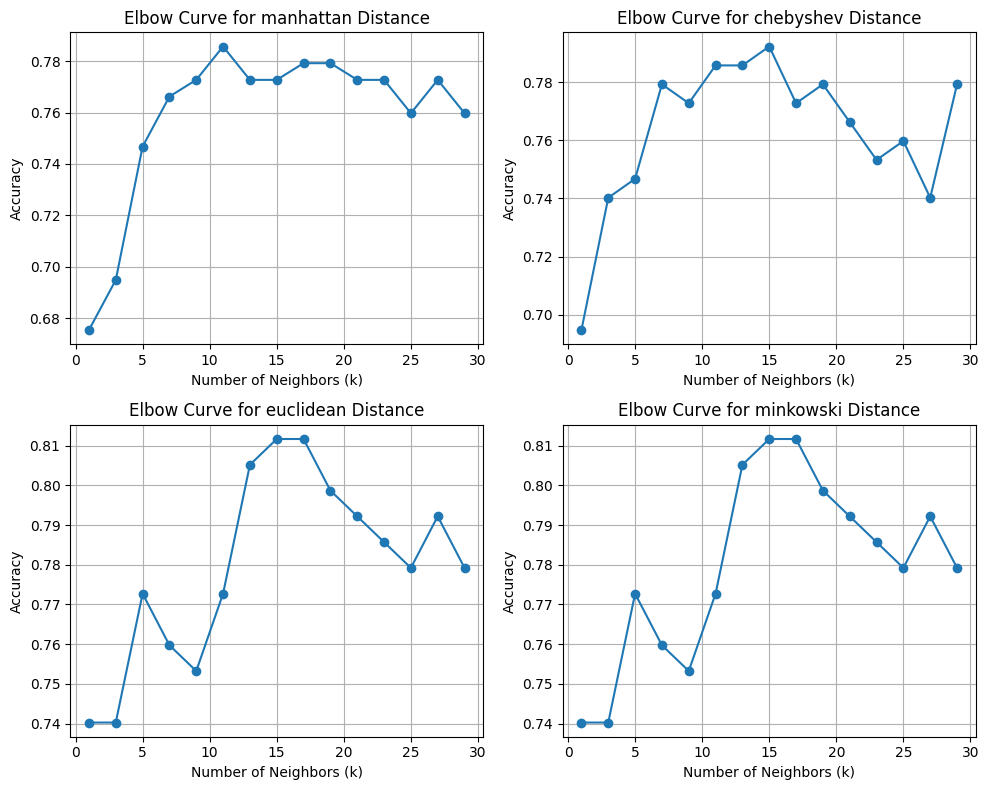

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for d_index, d in enumerate(dist):
    accuracy_scores_dist = [row[d_index] for row in accuracy_scores]
    row = d_index // 2
    col = d_index % 2

    ax = axes[row, col]
    ax.plot(k_values, accuracy_scores_dist, marker='o')
    ax.set_title(f'Elbow Curve for {d} Distance')
    ax.set_xlabel('Number of Neighbors (k)')
    ax.set_ylabel('Accuracy')
    ax.grid(True)

plt.tight_layout()
plt.show()